![](https://www.finplus.co.in/wp-content/uploads/2017/10/Top-Categories-In-Online-Retail-In-India.jpg)

## Overview
<a href="https://archive.ics.uci.edu/ml/datasets/online+retail">Online retail is a transnational data set</a> which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## Business Goal
We aim to segement the Customers based on RFM so that the company can target its customers efficiently.

#### The steps are broadly divided into:

1. [Step 1: Reading and Understanding the Data](#1)
1. [Step 2: Data Cleansing](#2)
1. [Step 3: Data Preparation](#3)
1. [Step 4: Model Building](#4)
1. [Step 5: Final Analysis](#5)

<a id="1"></a> <br>
## Step 1 : Reading and Understanding Data

In [2]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
from sklearn.metrics import calinski_harabasz_score
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from fcmeans import FCM 
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
# Reading the data on which analysis needs to be done

retail = pd.read_csv('OnlineRetail.csv', sep=",", encoding="ISO-8859-1", header=0)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
# shape of df

retail.shape

(541909, 8)

In [5]:
# df info

retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# df description

retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


<a id="2"></a> <br>
## Step 2 : Data Cleansing

In [7]:
# Calculating the Missing Values % contribution in DF

df_null = round(100*(retail.isnull().sum())/len(retail), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [8]:
# Droping rows having missing values

retail = retail.dropna()
retail.shape

(406829, 8)

In [9]:
# Changing the datatype of Customer Id as per Business understanding

retail['CustomerID'] = retail['CustomerID'].astype(str)

In [10]:
retail = retail[retail['Quantity'] >=0 ]
# retail = retail[retail['CustomerID'] != "15808.0" ]
# retail = retail[retail['CustomerID'] != "17850.0" ]
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


<a id="3"></a> <br>
## Step 3 : Data Preparation

#### We are going to analysis the Customers based on below 3 factors:
- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

In [11]:
# New Attribute : Monetary

retail['Monetary'] = retail['Quantity']*retail['UnitPrice']
rfm_m = retail.groupby('CustomerID')['Monetary'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [12]:
# New Attribute : Frequency

rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [13]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Monetary,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [14]:
# New Attribute : Recency

# Convert to datetime to proper datatype

retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [15]:
# Compute the maximum date to know the last transaction date

max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [16]:
# Compute the difference between max date and transaction date

retail['Diff'] = max_date - retail['InvoiceDate']
retail.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
...,...,...,...,...,...,...,...,...,...,...
95,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,2010-12-01 09:37:00,2.55,14688.0,United Kingdom,15.30,373 days 03:13:00
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688.0,United Kingdom,50.40,373 days 03:13:00
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom,13.20,373 days 03:13:00
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom,13.20,373 days 03:13:00


In [17]:
# Compute last transaction date to get the recency of customers

rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [18]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [19]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Monetary', 'Frequency', 'Recency']
rfm

,CustomerID,Monetary,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4334,18280.0,180.60,10,277
4335,18281.0,80.82,7,180
4336,18282.0,178.05,12,7
4337,18283.0,2094.88,756,3


In [20]:
rfm = rfm[rfm['Monetary'] >= 0]

In [21]:
# recency_labels = range(4,0,-1) # notice that the lowest value is given the highest ranking. 

# rfm['R_score'] = pd.qcut(rfm['Recency'], q=4,labels=recency_labels)

# rfm

In [22]:
# Monetary_labels = range(1,5)

# rfm['M_score'] = pd.qcut(rfm['Monetary'], q=4,labels=Monetary_labels)

# rfm

In [23]:
# Frequency_labels = range(1,100)

# rfm['F_score'] = pd.cut(rfm['Frequency'], q=4,labels=Frequency_labels)

# rfm

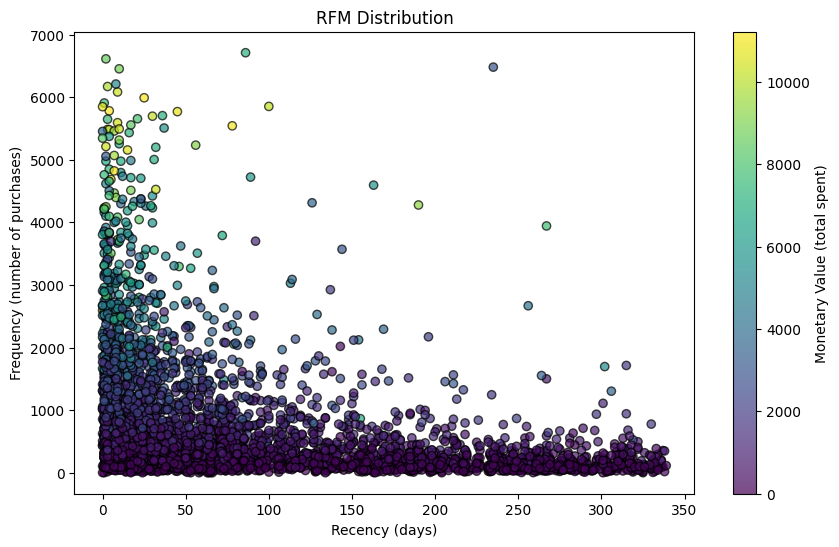

In [305]:
plt.figure(figsize=(10, 6))
plt.scatter(rfm['Recency'], rfm['Frequency'], c=rfm['Monetary'], cmap='viridis', alpha=0.7, edgecolors='k')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency (number of purchases)')
plt.title('RFM Distribution')
plt.colorbar(label='Monetary Value (total spent)')
plt.show()

#### There are 2 types of outliers and we will treat outliers as it can skew our dataset
- Statistical
- Domain specific

Text(0.5, 0, 'Attributes')

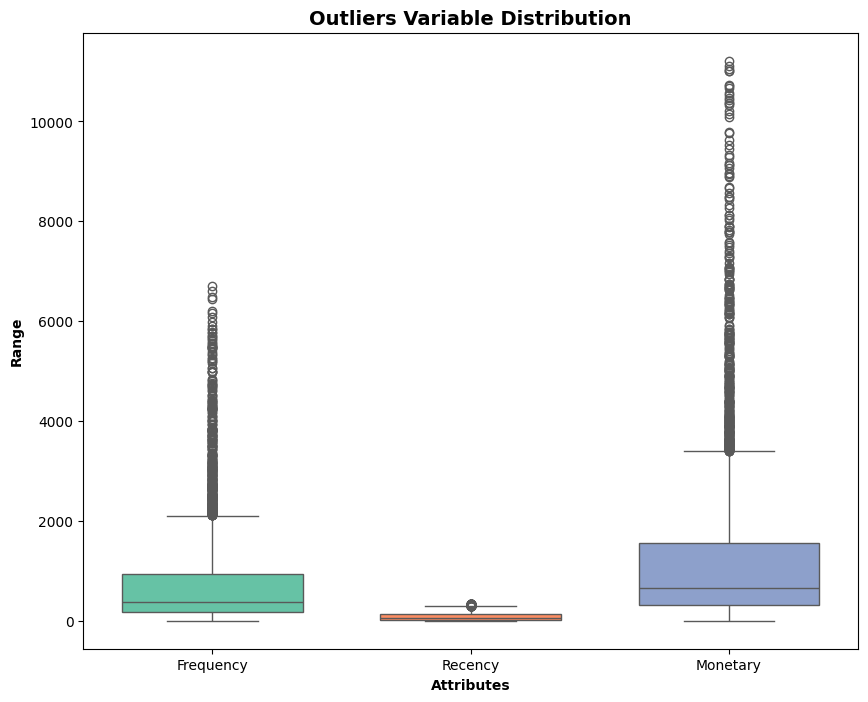

In [304]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Frequency','Recency','Monetary']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [303]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Monetary.quantile(0.05)
Q3 = rfm.Monetary.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Monetary >= Q1 - 1.5*IQR) & (rfm.Monetary <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
# Q1 = rfm.Recency.quantile(0.05)
# Q3 = rfm.Recency.quantile(0.95)
# IQR = Q3 - Q1
# rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]
rfm.shape

(4067, 3)

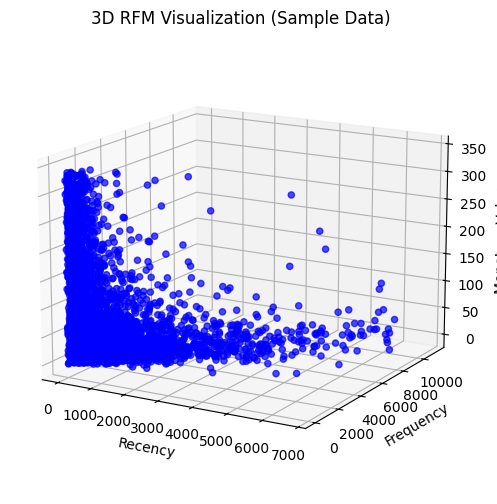

In [306]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(rfm['Frequency'], rfm['Monetary'], rfm['Recency'], c='blue', marker='o', alpha=0.7)

# Label the axes
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')

# Add a title and rotate the plot for better viewing
ax.set_title('3D RFM Visualization (Sample Data)')
ax.view_init(elev=15, azim=-60)

# Show the plot
plt.show()


### Rescaling the Attributes

It is extremely important to rescale the variables so that they have a comparable scale.|
There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, we will use Standardisation Scaling.

In [289]:
lol = pd.read_csv('lol.csv')
# lol = lol[lol['Monetary'] <= 1500]
lol = lol[lol['Monetary'] >= 0000]
lol = lol[lol['Recency'] < 350]
# lol = lol[lol['Frequency'] <= 1000]
rfm = lol
lol.shape
# lol[lol['Frequency'] == 5]


(4158, 3)

In [307]:
# Rescaling the attributes

rfm_df = rfm[['Monetary', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4067, 3)

In [308]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Monetary', 'Frequency', 'Recency']
rfm_df_scaled.head(10)

,Monetary,Frequency,Recency
0,-0.786486,-0.780744,2.712542
1,1.884142,1.762710,-0.908502
2,0.104079,1.632330,-0.090124
3,0.116663,-0.128841,-0.729131
4,-0.604065,-0.577930,2.544382
5,-0.002393,-0.301647,-0.527339
6,-0.731338,-0.760048,1.356052
7,-0.117652,-0.232318,1.669950
8,-0.501826,-0.532400,1.468158
9,0.754814,0.846942,-0.684289


In [309]:
len(rfm_df_scaled['Monetary'].unique())

3995

<a id="4"></a> <br>
## Step 4 : Building the Model

### K-Means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.<br>

The algorithm works as follows:

- First we initialize k points, called means, randomly.
- We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
- We repeat the process for a given number of iterations and at the end, we have our clusters.

In [33]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=4)

In [34]:
kmeans.labels_

array([2, 2, 0, ..., 1, 3, 1])

### Finding the Optimal Number of Clusters

#### Elbow Curve to get the right number of Clusters
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

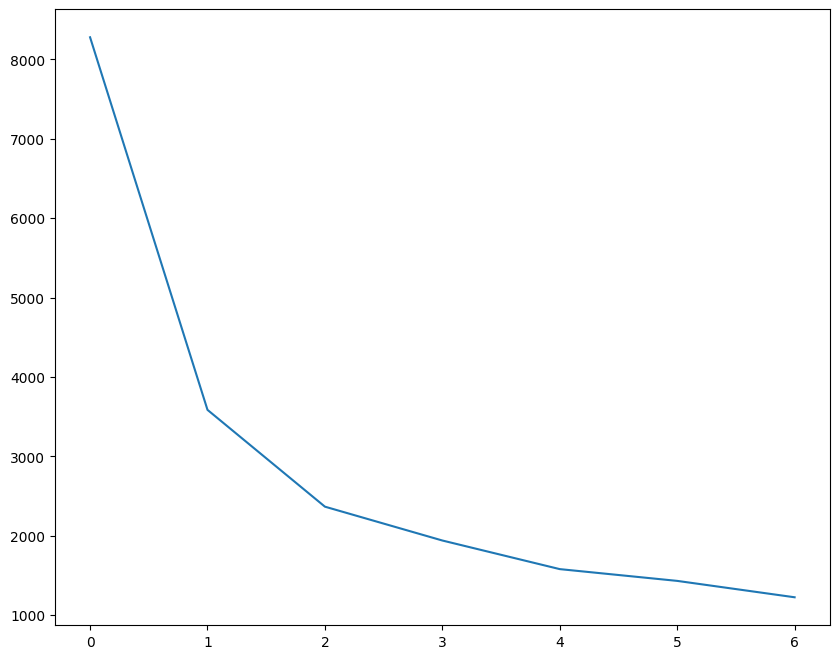

In [310]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [410]:
# Silhouette analysis
range_n_clusters = [ 3, 4, 5, 6]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,init = 'k-means++')
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    print("sil ===",silhouette_score(rfm_df_scaled,cluster_labels))
    print("cal===",calinski_harabasz_score(rfm_df_scaled,cluster_labels))
    print("dav===",davies_bouldin_score(rfm_df_scaled,cluster_labels))
    print("_"*25)
    
    

sil === 0.5326184364605754
cal=== 4883.416508645819
dav=== 0.6393296188318662
_________________________
sil === 0.5192908442970405
cal=== 5630.677389990225
dav=== 0.6794701092749322
_________________________
sil === 0.4585972025969207
cal=== 5202.669398242682
dav=== 0.7188432372559088
_________________________
sil === 0.41584861223515274
cal=== 5029.259467018135
dav=== 0.8512494640055671
_________________________


In [312]:
kmeans = KMeans(n_clusters=4, init="random")
kmeans.fit(rfm_df_scaled)
rfm['Kmeans'] = kmeans.labels_
rfm.head()


,Recency,Frequency,Monetary,Kmeans
0,325,0,0.00,2
1,2,2458,4310.00,1
2,75,2332,1437.24,1
3,18,630,1457.55,0
4,310,196,294.40,2


In [423]:
from sklearn.cluster import BisectingKMeans
bise = BisectingKMeans(n_clusters=4,  init='random')
bise.fit(rfm_df_scaled)
B_kmeans = bise.labels_
print("sil ===",silhouette_score(rfm_df_scaled,B_kmeans))
print("cal===",calinski_harabasz_score(rfm_df_scaled,B_kmeans))
print("dav===",davies_bouldin_score(rfm_df_scaled,B_kmeans))
rfm['B_kmeans'] = B_kmeans

sil === 0.5208764330820606
cal=== 5095.692929877736
dav=== 0.6890392508968924


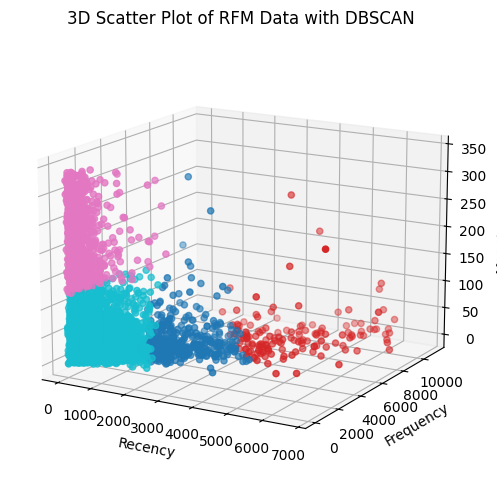

In [424]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Extract data for the 3D plot (replace with desired features)
x = rfm["Frequency"]
y = rfm["Monetary"]
z = rfm["Recency"]
colors = rfm["B_kmeans"]  
# Use DBS_clustering for color mapping
# colors = rfm["Mean_Shift"]  # Use DBS_clustering for color mapping

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color-coded clusters
ax.scatter(x, y, z, c=colors, cmap="tab10")

# Add labels and title
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
ax.set_title("3D Scatter Plot of RFM Data with DBSCAN")

# Rotate the plot for better visualization
ax.view_init(elev=15, azim=-60)

# Show the plot
plt.show()


<Axes: xlabel='Kmeans', ylabel='Monetary'>

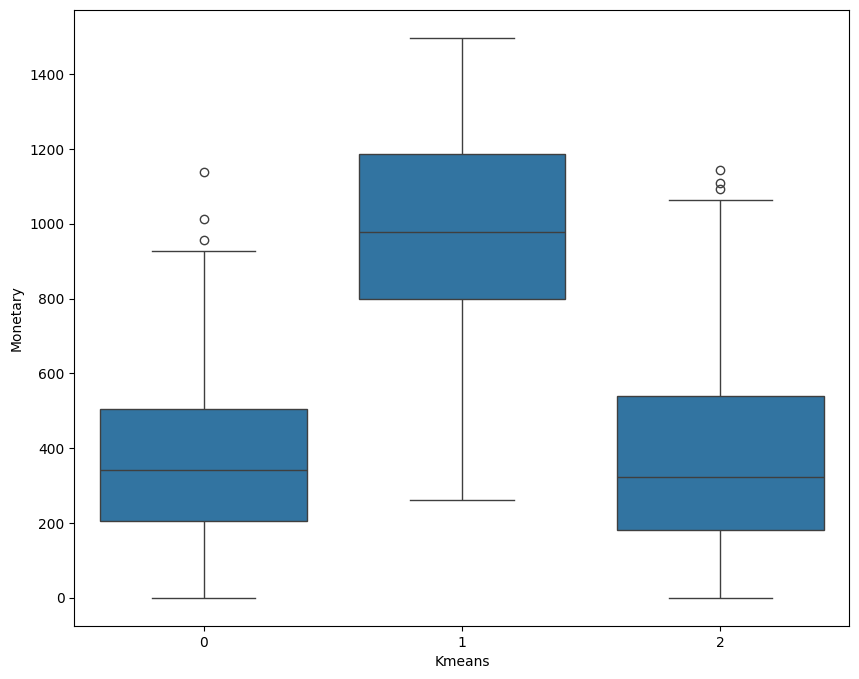

In [88]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Kmeans', y='Monetary', data=rfm)

<Axes: xlabel='Kmeans', ylabel='Frequency'>

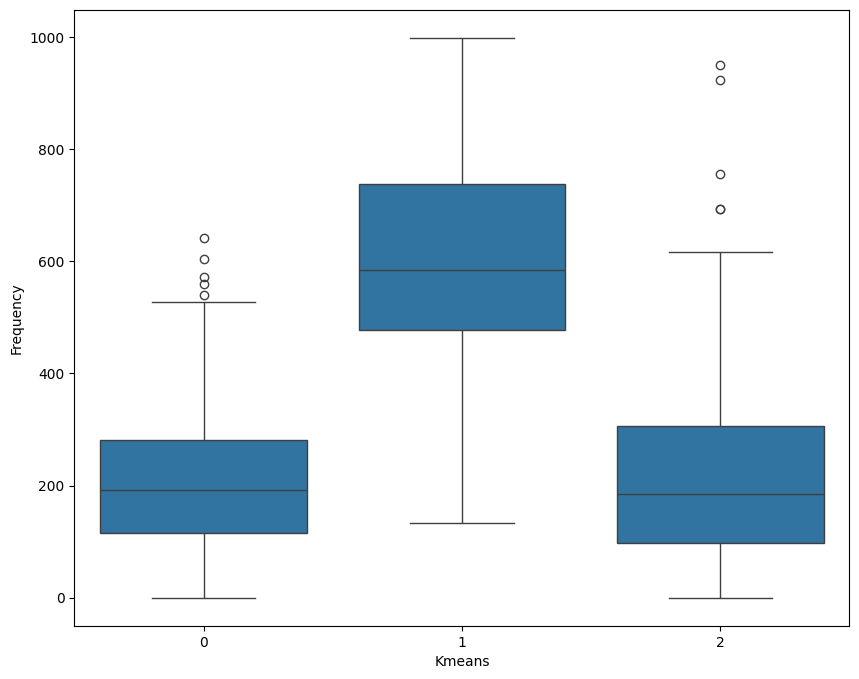

In [90]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Kmeans', y='Frequency', data=rfm)

<Axes: xlabel='Kmeans', ylabel='Recency'>

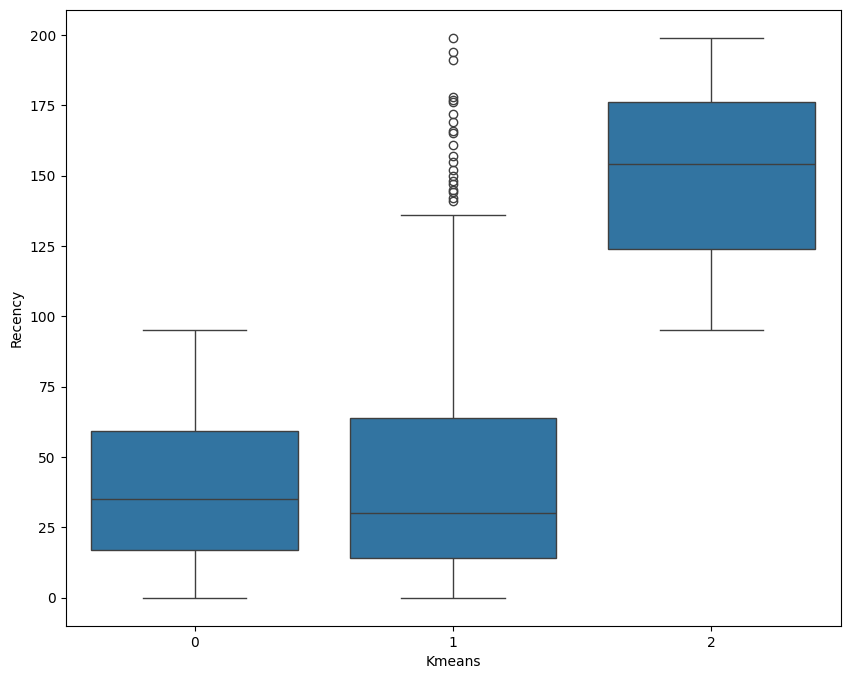

In [91]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Kmeans', y='Recency', data=rfm)

In [425]:
fcm = FCM(n_clusters=4)

fcm.fit(rfm_df_scaled.to_numpy())
Fuzzy_c = fcm.predict(rfm_df_scaled.to_numpy())
rfm['Fuzzy_c'] = Fuzzy_c
rfm

array([[-0.42702936, -0.4320023 , -0.45320119],
       [ 3.04769405,  3.03927495, -0.7124575 ],
       [ 0.67944115,  0.70173352, -0.58818433],
       [-0.53543039, -0.55510791,  1.70552207]])

In [426]:
Fuzzy_c = fcm.predict(rfm_df_scaled.to_numpy())
rfm['Fuzzy_c'] = Fuzzy_c
rfm

,Recency,Frequency,Monetary,Kmeans,B_kmeans,Fuzzy_c
0,325,0,0.00,2,2,3
1,2,2458,4310.00,1,0,2
2,75,2332,1437.24,1,0,2
3,18,630,1457.55,0,3,0
4,310,196,294.40,2,2,3
...,...,...,...,...,...,...
4277,277,45,180.60,2,2,3
4278,180,54,80.82,2,2,3
4279,7,98,176.60,0,3,0
4280,3,1355,2039.58,1,3,2


<Axes: xlabel='Fuzzy_c', ylabel='Monetary'>

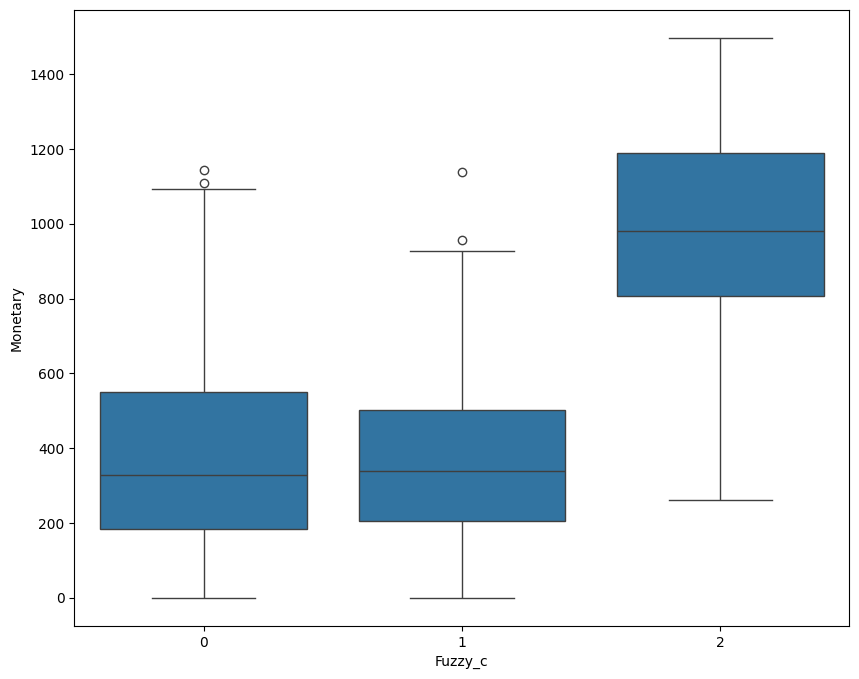

In [94]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Fuzzy_c', y='Monetary', data=rfm)

<Axes: xlabel='Fuzzy_c', ylabel='Frequency'>

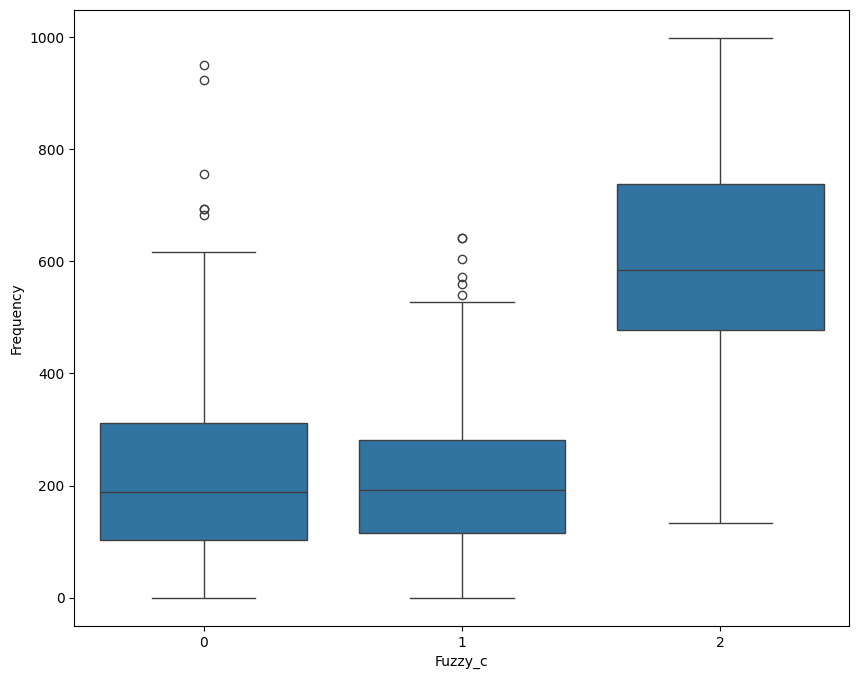

In [95]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Fuzzy_c', y='Frequency', data=rfm)

<Axes: xlabel='Fuzzy_c', ylabel='Recency'>

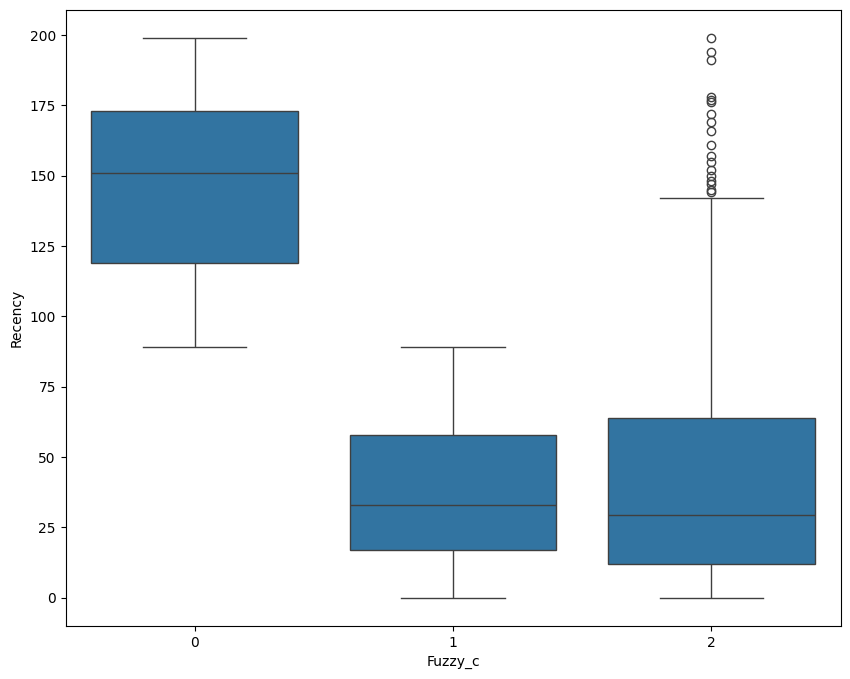

In [96]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Fuzzy_c', y='Recency', data=rfm)

In [97]:
k=3
rfm_sorted = np.sort(rfm_df_scaled, axis=0)  # Sort each column (R, F, M)

  # Step 3: Calculate segment size
n, _ = rfm_df_scaled.shape
segment_size = n // k

  # Step 4: Initialize centroids with medians
centroids = np.zeros((k,3))
for i in range(k):
    segment_start = i * segment_size
    segment_end = segment_start + segment_size
    segment_data = rfm_sorted[segment_start:segment_end]
    centroids[i] = np.median(segment_data, axis=0)

RM_Kmeans = KMeans(n_clusters=3, init=centroids)
RM_Kmeans.fit(rfm_df_scaled)

KMeans(init=array([[-1.00996457, -0.96387361, -0.93032837],
       [-0.20595303, -0.24118012, -0.31672054],
       [ 1.10605444,  1.05751086,  1.11503105]]),
       n_clusters=3)

In [99]:
RM_Kmeans.labels_

array([2, 2, 0, ..., 0, 1, 0])

In [100]:
RM_Kmeans.n_iter_

11

In [101]:
# assign the label
rfm['RM_Kmeans'] = RM_Kmeans.labels_
rfm.head()

,Recency,Frequency,Monetary,Kmeans,B_kmeans,Fuzzy_c,RM_Kmeans,Herarchical
3,18,630,1457.55,1,2,2,2,0
5,36,463,1265.41,1,2,2,2,0
11,1,242,928.06,0,2,1,0,1
16,109,408,552.00,2,1,0,1,1
19,4,172,150.90,0,0,1,0,1


In [102]:
    print("sil ===",silhouette_score(rfm_df_scaled,rfm['RM_Kmeans']))
    print("cal===",calinski_harabasz_score(rfm_df_scaled,rfm['RM_Kmeans']))
    print("dav===",davies_bouldin_score(rfm_df_scaled,rfm['RM_Kmeans']))
    print("_"*25)

sil === 0.4249341093025972
cal=== 2117.3765681678387
dav=== 0.836578564675165
_________________________


<Axes: xlabel='RM_Kmeans', ylabel='Monetary'>

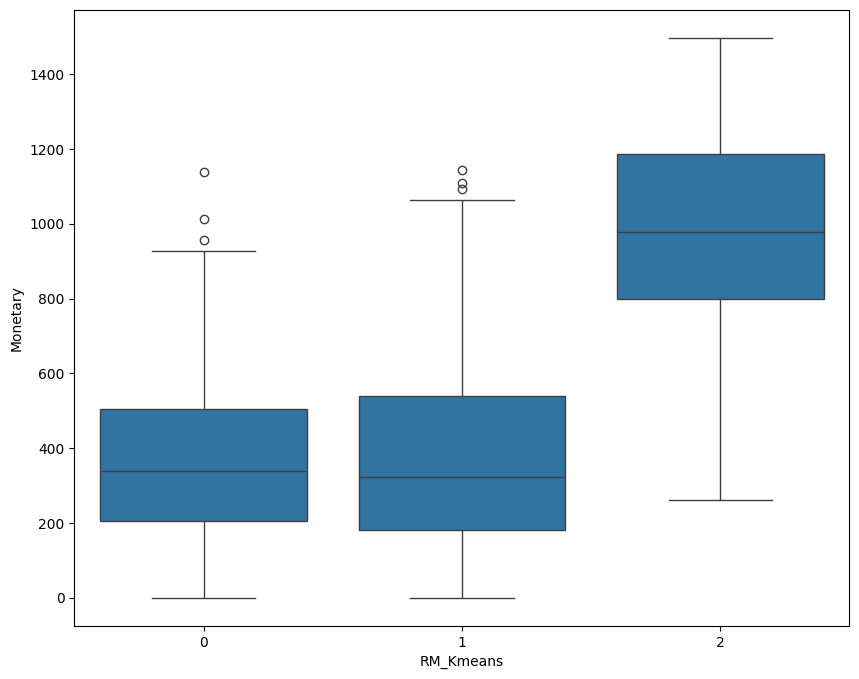

In [103]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='RM_Kmeans', y='Monetary', data=rfm)

<Axes: xlabel='RM_Kmeans', ylabel='Frequency'>

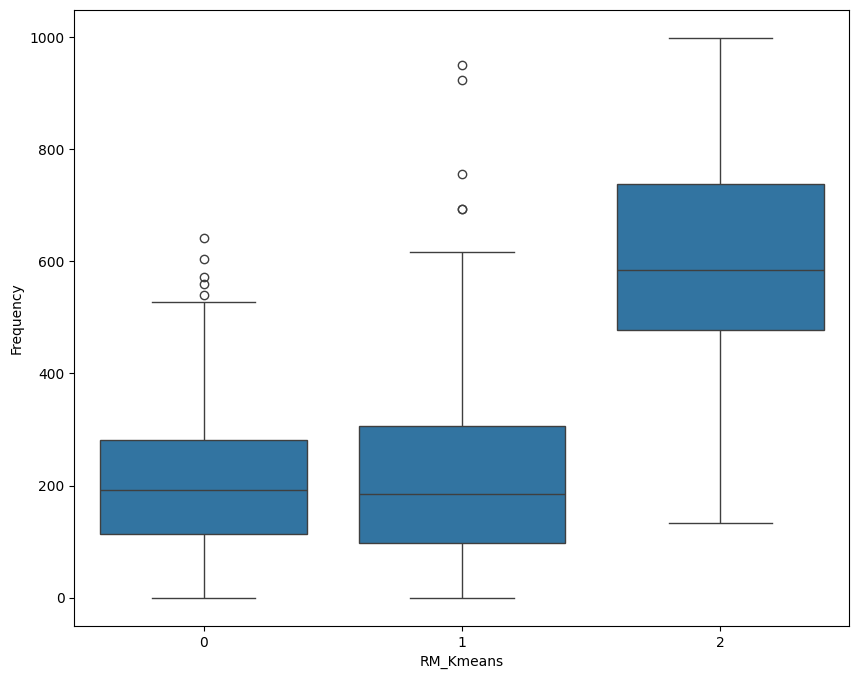

In [104]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='RM_Kmeans', y='Frequency', data=rfm)

<Axes: xlabel='RM_Kmeans', ylabel='Recency'>

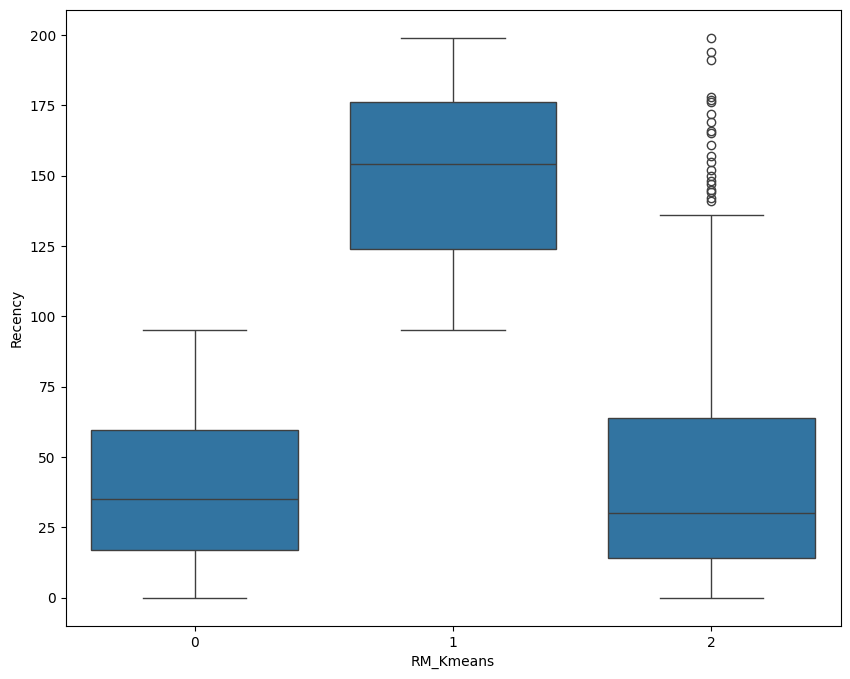

In [105]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='RM_Kmeans', y='Recency', data=rfm)

### Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering, 
- Divisive 
- Agglomerative.

**Single Linkage:<br>**

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.
![](https://www.saedsayad.com/images/Clustering_single.png)

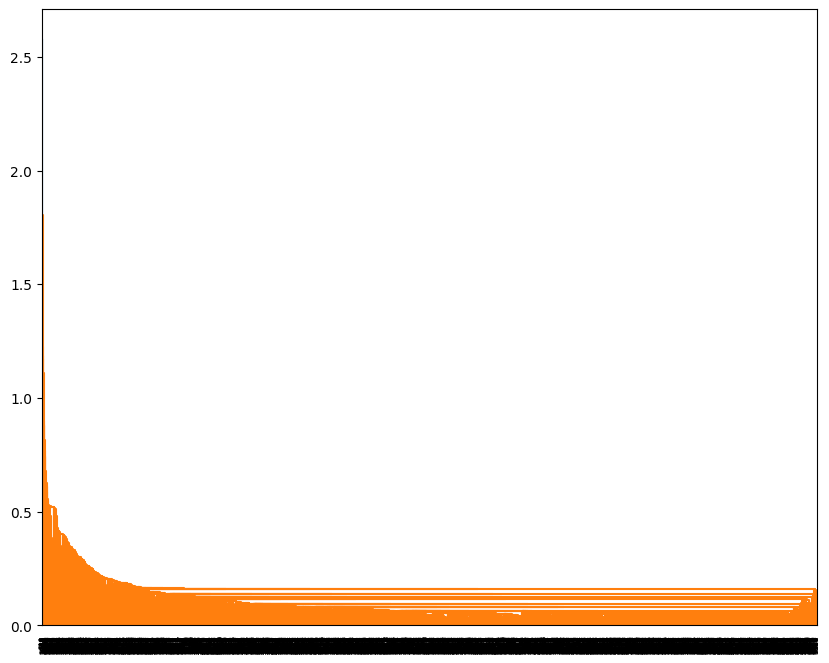

In [427]:
# Single linkage: 

mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

**Complete Linkage<br>**

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points. 
![](https://www.saedsayad.com/images/Clustering_complete.png)

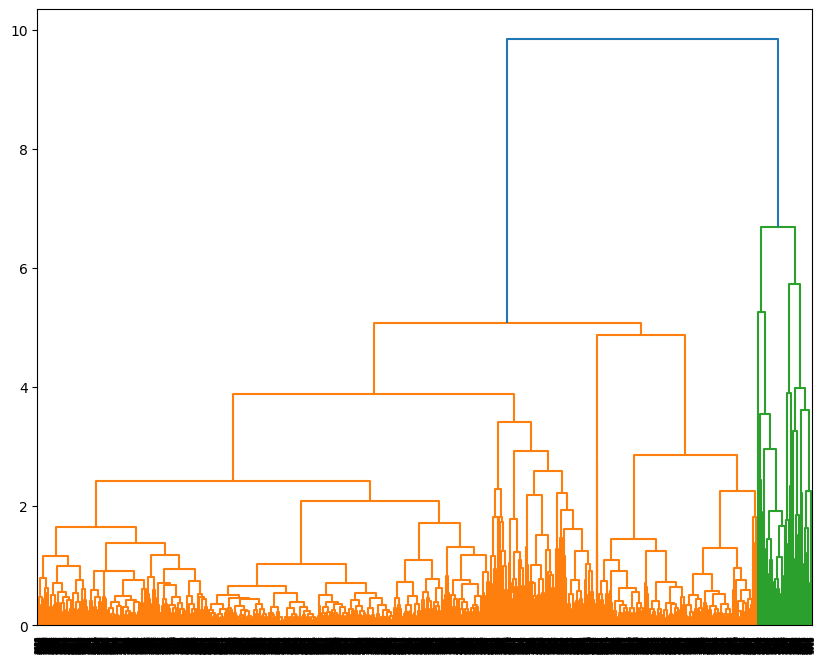

In [428]:
# Complete linkage

mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

**Average Linkage:<br>**

In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other.
![](https://www.saedsayad.com/images/Clustering_average.png)

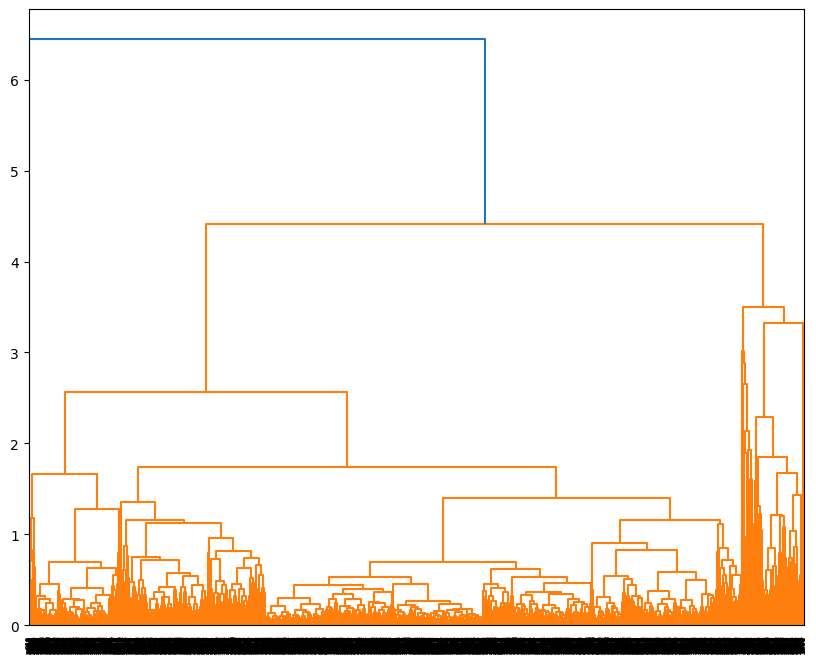

In [429]:
# Average linkage

mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

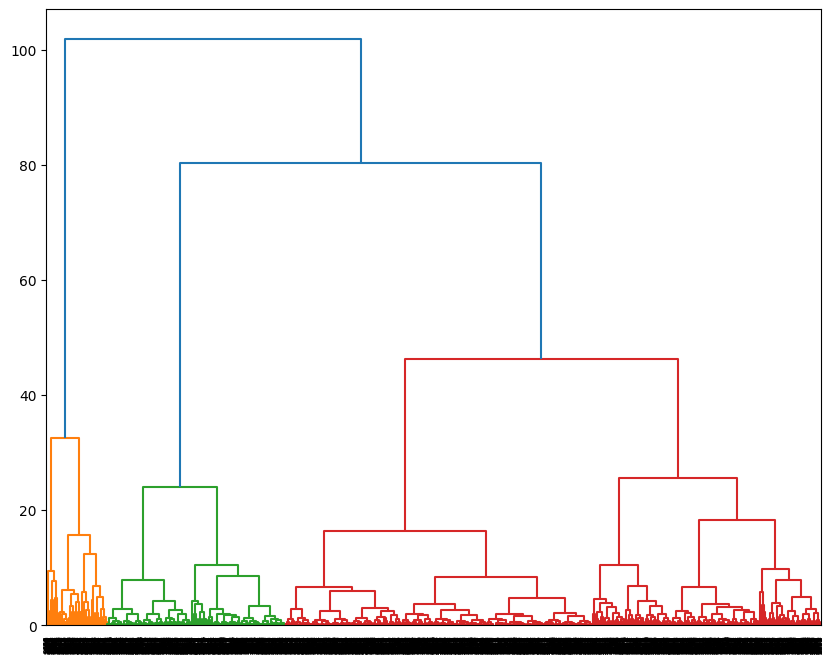

In [430]:
# Average linkage

mergings = linkage(rfm_df_scaled, method="ward", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Cutting the Dendrogram based on K

In [431]:



for i in range(2, 10):
    cluster_labels = cut_tree(mergings, n_clusters=i).reshape(-1, )
    print("sil ===",silhouette_score(rfm_df_scaled,cluster_labels))
    print("cal===",calinski_harabasz_score(rfm_df_scaled,cluster_labels))
    print("dav===",davies_bouldin_score(rfm_df_scaled,cluster_labels))
    print("_"*25)


sil === 0.6257625609312182
cal=== 3021.511952193279
dav=== 0.6329360201381489
_________________________
sil === 0.5164051120576224
cal=== 4542.311264327813
dav=== 0.6391172524460709
_________________________
sil === 0.43708742474318296
cal=== 4767.508043685157
dav=== 0.7840037670483021
_________________________
sil === 0.4358480530233377
cal=== 4692.4752175367075
dav=== 0.7818701154255985
_________________________
sil === 0.40328162083012187
cal=== 4563.954741722771
dav=== 0.9156478915481588
_________________________
sil === 0.37545677697763413
cal=== 4628.417472358094
dav=== 0.9096649497891426
_________________________
sil === 0.3664876409591581
cal=== 4520.3534395172255
dav=== 0.8615411872518356
_________________________
sil === 0.3411366136071046
cal=== 4431.9240357928265
dav=== 0.8837164500338989
_________________________


In [432]:
# Assign cluster labels
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
rfm['Herarchical'] = cluster_labels
rfm.head()

,Recency,Frequency,Monetary,Kmeans,B_kmeans,Fuzzy_c,Herarchical
0,325,0,0.00,2,2,3,0
1,2,2458,4310.00,1,0,2,1
2,75,2332,1437.24,1,0,2,2
3,18,630,1457.55,0,3,0,2
4,310,196,294.40,2,2,3,0


<Axes: xlabel='Herarchical', ylabel='Monetary'>

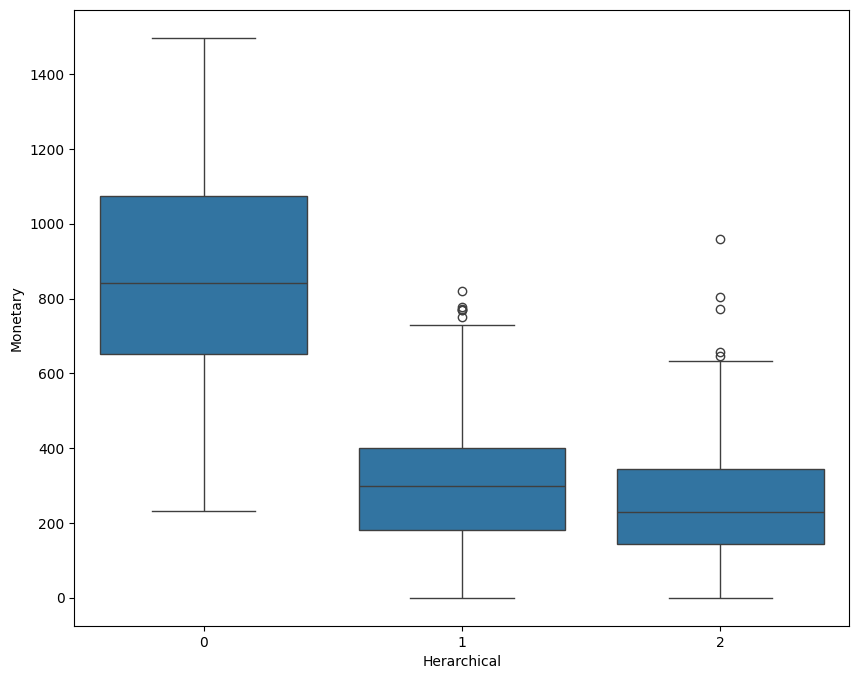

In [143]:
# Plot Cluster Id vs Amount

sns.boxplot(x='Herarchical', y='Monetary', data=rfm)

<Axes: xlabel='Herarchical', ylabel='Frequency'>

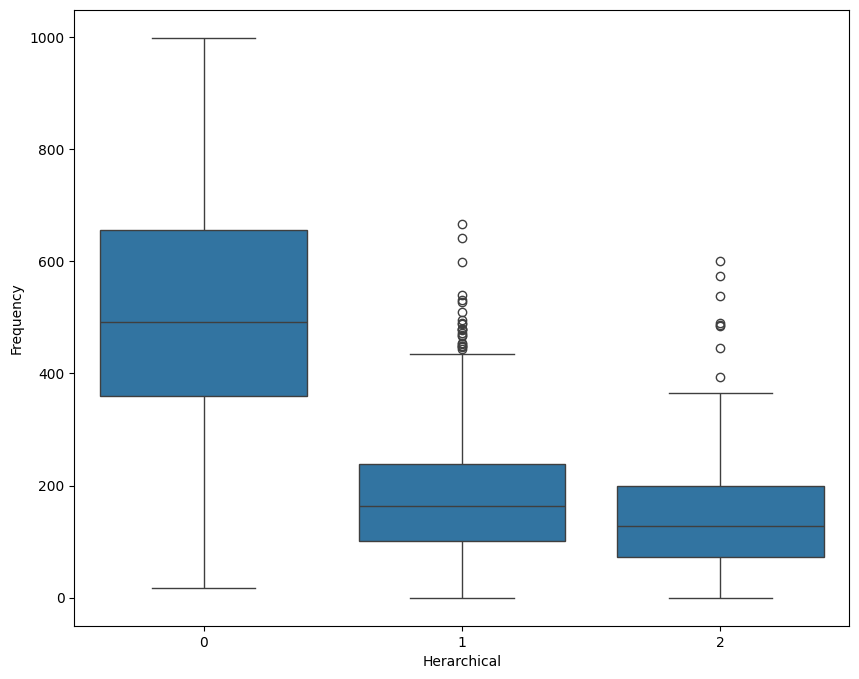

In [144]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='Herarchical', y='Frequency', data=rfm)

<Axes: xlabel='Herarchical', ylabel='Recency'>

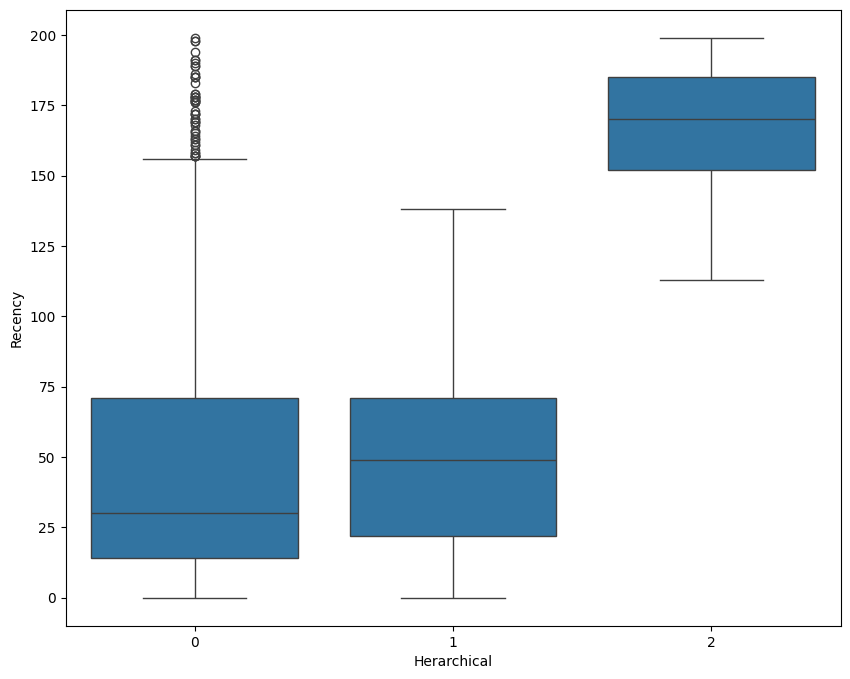

In [145]:
# Plot Cluster Id vs Recency

sns.boxplot(x='Herarchical', y='Recency', data=rfm)

In [146]:
rfm.loc[rfm['Herarchical'] == 3, 'Herarchical'] = 2

In [147]:
len(rfm[rfm['Herarchical']==0])

1070

In [441]:
from itertools import product

eps_values = np.arange(0.2,0.4,0.01) # eps values to be investigated
min_samples = np.arange(5, 20) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

In [443]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0],min_samples=p[1]).fit(rfm_df_scaled)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(rfm_df_scaled, DBS_clustering.labels_))

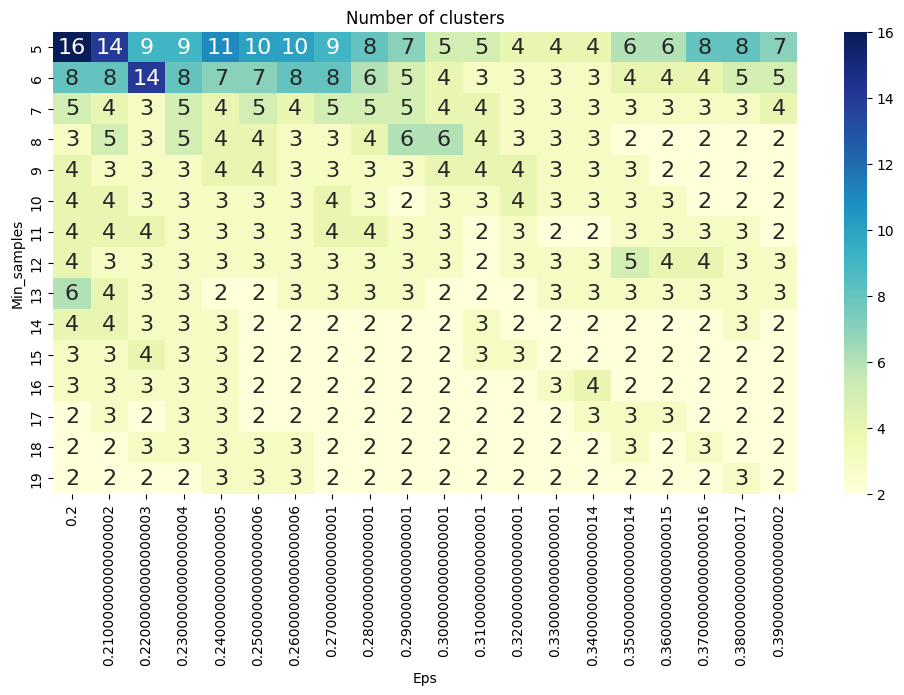

In [444]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

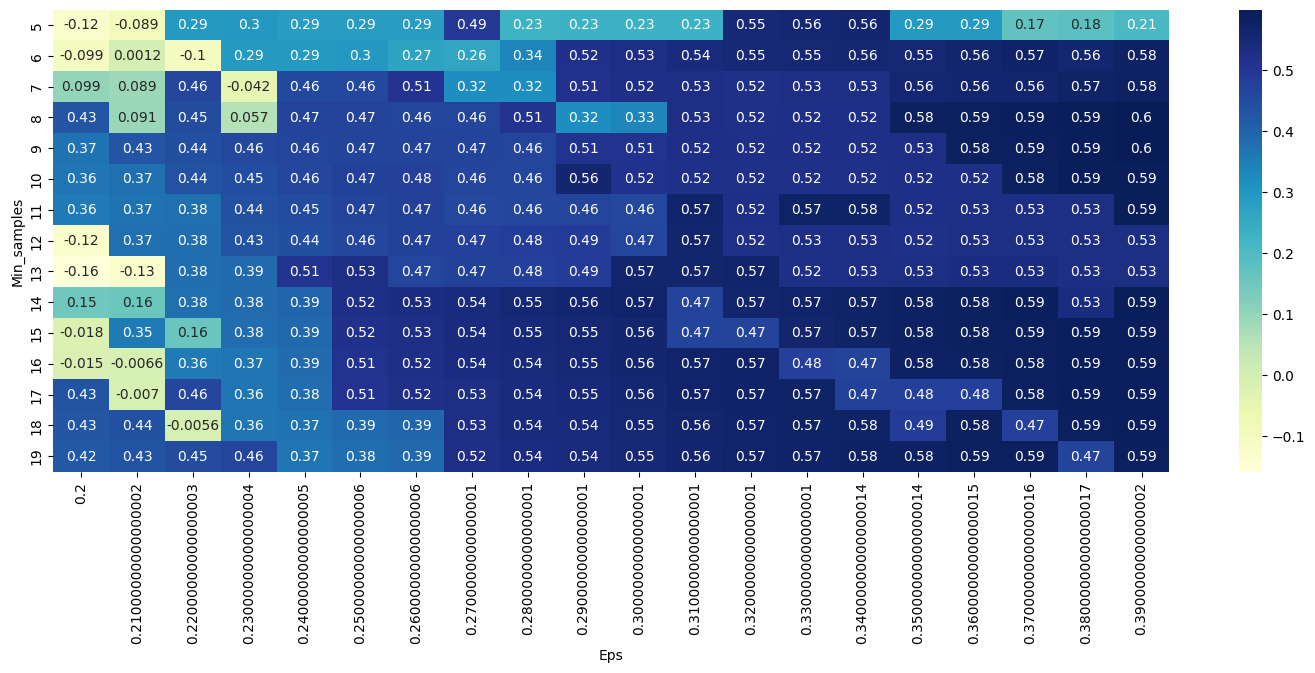

In [445]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [154]:
from sklearn.cluster import DBSCAN
x = DBSCAN(eps= 0.44, min_samples= 28).fit(rfm_df_scaled)
rfm['DBS_clustering']  = x.labels_
np.unique(rfm['DBS_clustering'])


array([-1,  0], dtype=int64)

In [446]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans

def mini_batch_kmeans_with_labeling(rfm_df, scaled_rfm_df, n_clusters, mini_batch_size, max_iter):
    """
    Implements mini-batch k-means clustering on the scaled RFM data and adds cluster labels to the original RFM DataFrame.

    Args:
        rfm_df (pandas.DataFrame): The original RFM DataFrame containing Recency, Frequency, and Monetary data.
        scaled_rfm_df (pandas.DataFrame): The scaled RFM DataFrame.
        n_clusters (int): The number of desired clusters.
        mini_batch_size (int): The size of the mini-batches.
        max_iter (int): The maximum number of iterations for the k-means algorithm.

    Returns:
        pandas.DataFrame: The original RFM DataFrame with an added column named 'cluster' containing the cluster labels.
    """

    # Create a MiniBatchKMeans object
    model = MiniBatchKMeans(n_clusters=n_clusters, random_state=0)

    # Train the model using partial_fit for each mini-batch
    for _ in range(max_iter):
        # Shuffle data for each iteration (optional, to avoid biases)
        shuffled_indices = np.random.permutation(len(scaled_rfm_df))
        scaled_rfm = scaled_rfm_df.iloc[shuffled_indices].reset_index(drop=True)

        # Iterate over mini-batches
        for i in range(0, len(scaled_rfm), mini_batch_size):
            mini_batch = scaled_rfm.iloc[i:i+mini_batch_size]
            model.partial_fit(mini_batch)

    # Predict cluster labels for all scaled data points
    cluster_labels = model.predict(scaled_rfm_df)

    # Add cluster labels to the original RFM DataFrame
    rfm_df['Incremental'] = cluster_labels

    return rfm_df

# Assuming you have your RFM data in a DataFrame named 'rfm_df'
# Example usage:
n_clusters = 3  # Replace with the desired number of clusters
mini_batch_size = 100
max_iter = 100

# Create a StandardScaler object for scaling (replace with your scaling method if needed
scaled_rfm_df = rfm_df_scaled
# Apply mini-batch k-means and add cluster labels
rfm_df_with_clusters = mini_batch_kmeans_with_labeling(rfm.copy(), scaled_rfm_df, n_clusters, mini_batch_size, max_iter)
rfm = rfm_df_with_clusters
print(rfm_df_with_clusters)  # Output the RFM DataFrame with the added 'cluster' column


      Recency  Frequency  Monetary  Kmeans  B_kmeans  Fuzzy_c  Herarchical  \
0         325          0      0.00       2         2        3            0   
1           2       2458   4310.00       1         0        2            1   
2          75       2332   1437.24       1         0        2            2   
3          18        630   1457.55       0         3        0            2   
4         310        196    294.40       2         2        3            0   
...       ...        ...       ...     ...       ...      ...          ...   
4277      277         45    180.60       2         2        3            0   
4278      180         54     80.82       2         2        3            0   
4279        7         98    176.60       0         3        0            3   
4280        3       1355   2039.58       1         3        2            2   
4281       42       1586   1837.28       1         3        2            2   

      Incremental  
0               2  
1               1  
2  

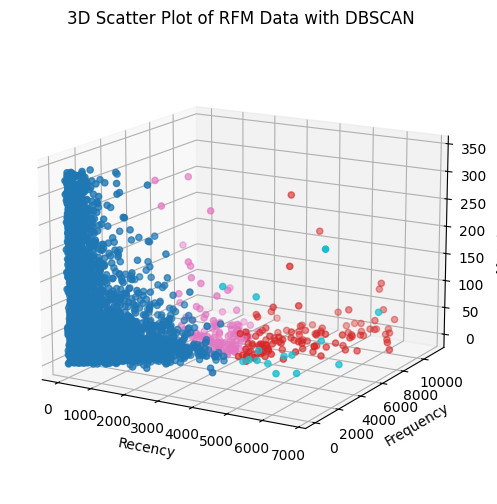

In [466]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Extract data for the 3D plot (replace with desired features)
x = rfm["Frequency"]
y = rfm["Monetary"]
z = rfm["Recency"]
colors = rfm["Mean_Shift"]  # Use DBS_clustering for color mapping

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color-coded clusters
ax.scatter(x, y, z, c=colors, cmap="tab10")

# Add labels and title
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
ax.set_title("3D Scatter Plot of RFM Data with DBSCAN")

# Rotate the plot for better visualization
ax.view_init(elev=15, azim=-60)

# Show the plot
plt.show()

In [448]:
from sklearn.cluster import AffinityPropagation


AF = AffinityPropagation(damping=0.59).fit(rfm_df_scaled)
rfm['affinity'] = AF.labels_
len(rfm['affinity'].unique())

75

In [158]:
# no_of_clusters = []
# preferences = range(-100,-1,1) # arbitraty chosen range
# af_sil_score = [] # silouette scores

# for p in preferences:
#     AF = AffinityPropagation(preference=p, max_iter=200).fit(rfm_df_scaled)
#     no_of_clusters.append((len(np.unique(AF.labels_))))
#     af_sil_score.append(silhouette_score(rfm_df_scaled, AF.labels_))
    
# af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index=['preference','clusters', 'sil_score']).T
# af_results.sort_values(by='sil_score', ascending=False).head() # display only 5 best scores

In [464]:
from sklearn.cluster import MeanShift, estimate_bandwidth

band = estimate_bandwidth(rfm_df_scaled )
msc = MeanShift(bandwidth=1.55)

meanshft = msc.fit(rfm_df_scaled)
rfm['Mean_Shift'] = msc.labels_
rfm

,Recency,Frequency,Monetary,Kmeans,B_kmeans,Fuzzy_c,Herarchical,Incremental,affinity,Mean_Shift
0,325,0,0.00,2,2,3,0,2,2,0
1,2,2458,4310.00,1,0,2,1,1,25,2
2,75,2332,1437.24,1,0,2,2,0,49,0
3,18,630,1457.55,0,3,0,2,0,69,0
4,310,196,294.40,2,2,3,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...
4277,277,45,180.60,2,2,3,0,2,51,0
4278,180,54,80.82,2,2,3,0,2,36,0
4279,7,98,176.60,0,3,0,3,0,41,0
4280,3,1355,2039.58,1,3,2,2,0,73,0


In [465]:
np.unique(rfm['Mean_Shift'])

array([0, 1, 2, 3], dtype=int64)

In [453]:
band

1.3238353362146824

In [161]:
MS = rfm.groupby('Mean_Shift').size().to_frame()
MS.columns = ["MS_size"]
MS

,MS_size
Mean_Shift,
0,1818
1,523


In [162]:
s = rfm_df_scaled.head(100)
d = rfm_df_scaled.tail(100)
d

,Monetary,Frequency,Recency
2241,-1.224917,-1.091154,0.668771
2242,-0.934874,-1.142929,-1.079082
2243,-1.284060,-0.340416,0.055163
2244,-0.390013,0.984163,-0.762981
2245,0.422433,1.092028,-0.502662
...,...,...,...
2336,-0.652343,-0.633808,-0.762981
2337,-1.273574,-1.138614,-0.074996
2338,-1.063672,-1.142929,0.203916
2339,-1.319837,-1.194704,2.193493


In [202]:
from sklearn.cluster import SpectralClustering
SC = SpectralClustering(n_clusters=3)
SC.fit(rfm_df_scaled)
SC.labels_

array([1, 1, 0, ..., 0, 2, 0])

In [203]:
print(silhouette_score(rfm_df_scaled,SC.labels_))

0.3979766001916433


In [ ]:
import pandas as pd
from scipy.cluster import hierarchy

class IncrementalHierarchicalClustering:
    def __init__(self, max_clusters=3, linkage='average'):
        self.max_clusters = max_clusters
        self.linkage = linkage
        self.Z = None  # Linkage matrix for the hierarchical tree

    def fit(self, X):
        self.Z = hierarchy.linkage(X, method=self.linkage)

    def partial_fit(self, X_new):
        if self.Z is None:
            self.fit(X_new)
        else:
            Z_new = hierarchy.linkage(X_new, method=self.linkage)
            combined_Z = hierarchy.leaders(Z_new, self.max_clusters)
            self.Z = combined_Z

# Example Usage
# Assuming you have a dataframe named `rfm_df` containing RFM values
# Example data:
# rfm_data = {
#     'Recency': [10, 20, 15],
#     'Frequency': [5, 10, 8],
#     'Monetary': [100, 200, 150]
# }
# rfm_df = pd.DataFrame(rfm_data)

# Initialize IncrementalHierarchicalClustering
incremental_clusterer = IncrementalHierarchicalClustering(max_clusters=3, linkage='average')

# Fit initial data
initial_data = s  # Assuming the initial dataset contains the first two data points
incremental_clusterer.fit(initial_data)

# Update with new data
new_data = d  # Assuming new data points arrive and need to be incorporated
incremental_clusterer.partial_fit(new_data)

# You can now use the linkage matrix incremental_clusterer.Z for further analysis or visualization


In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Sample RFM data before adding new data point
rfm_data_before = pd.DataFrame({
    'Recency': [5, 3, 8, 2, 9],
    'Frequency': [10, 5, 3, 7, 1],
    'Monetary': [100, 50, 30, 70, 10]
})

# Sample RFM data after adding new data point
rfm_data_after = pd.DataFrame({
    'Recency': [5, 3, 8, 2, 9, 6],
    'Frequency': [10, 5, 3, 7, 1, 4],
    'Monetary': [100, 50, 30, 70, 10, 60]
})

# Perform hierarchical clustering on both datasets
Z_before = linkage(rfm_data_before, method='ward')
Z_after = linkage(rfm_data_after, method='ward')

# Plot dendrograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
dendrogram(Z_before, labels=rfm_data_before.index, leaf_rotation=90)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram Before Adding New Data')

plt.subplot(1, 2, 2)
dendrogram(Z_after, labels=rfm_data_after.index, leaf_rotation=90)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram After Adding New Data')

plt.tight_layout()
plt.show()


<a id="5"></a> <br>
## Step 5 : Final Analysis

In [467]:
print("Clustering Kmeans             ",silhouette_score(rfm_df_scaled,rfm['Kmeans']) )
print("Clustering Fuzzy C means      ",silhouette_score(rfm_df_scaled,rfm['Fuzzy_c']) )
print("Clustering RM_Kmeans          ",silhouette_score(rfm_df_scaled,rfm['RM_Kmeans']) )
# print("Clustering Incremental Kmeans ",silhouette_score(rfm_df_scaled,rfm['Incremental']) )
print("Clustering Herarchical        ",silhouette_score(rfm_df_scaled,rfm['Herarchical']) )
print("Clustering DBSCAN             ",silhouette_score(rfm_df_scaled,rfm['DBS_clustering']) )
print("Clustering Mean Shift         ",silhouette_score(rfm_df_scaled,rfm['Mean_Shift']) )

Clustering Kmeans              0.5200470703998078
Clustering Fuzzy C means       0.5082660238569623


KeyError: 'RM_Kmeans'

In [ ]:
xyz = [silhouette_score(rfm_df_scaled,rfm['Kmeans']),silhouette_score(rfm_df_scaled,rfm['Fuzzy_c']),silhouette_score(rfm_df_scaled,rfm['RM_Kmeans']),silhouette_score(rfm_df_scaled,rfm['Incremental']),silhouette_score(rfm_df_scaled,rfm['Herarchical']),silhouette_score(rfm_df_scaled,rfm['DBS_clustering']), silhouette_score(rfm_df_scaled,rfm['Mean_Shift'])]

In [ ]:
xxxx = [davies_bouldin_score(rfm_df_scaled,rfm['Kmeans']),davies_bouldin_score(rfm_df_scaled,rfm['Fuzzy_c']),davies_bouldin_score(rfm_df_scaled,rfm['RM_Kmeans']),davies_bouldin_score(rfm_df_scaled,rfm['Incremental']),davies_bouldin_score(rfm_df_scaled,rfm['Herarchical']),davies_bouldin_score(rfm_df_scaled,rfm['DBS_clustering']), davies_bouldin_score(rfm_df_scaled,rfm['Mean_Shift'])]

In [ ]:
xxxx[4] = 0.6915648752158498
xxxx

[0.7443441697644692,
 0.7513984055759763,
 0.7443441697644692,
 0.7416591652231813,
 0.6915648752158498,
 1.0556963114310836,
 0.8097406559229974]

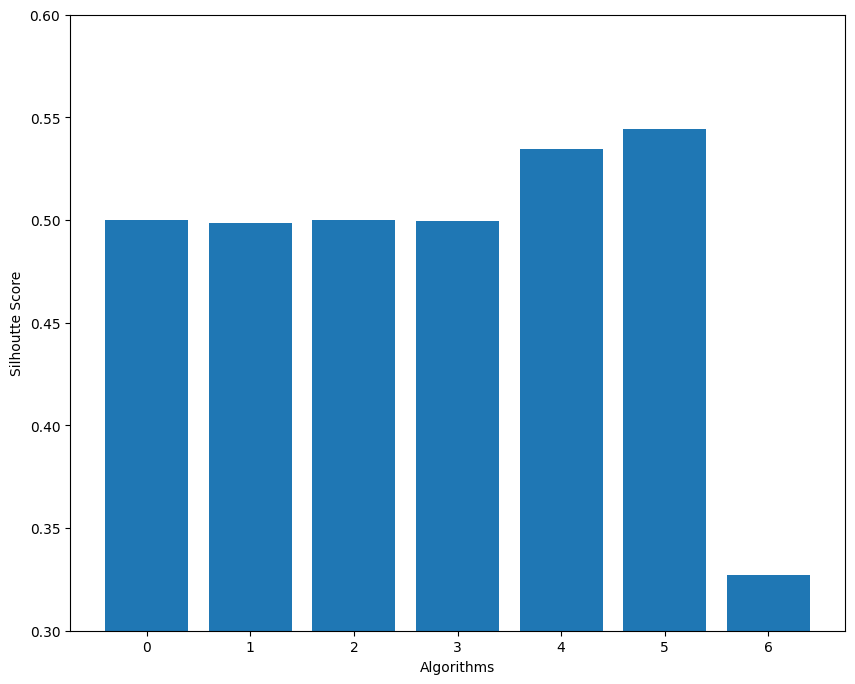

In [ ]:
plt.bar(range(len(xyz)),xyz)
# for i, value in enumerate(xyz):
#     plt.text(i,value+1, str(value), ha ='center', va='bottom' )
plt.xlabel("Algorithms")
plt.ylabel("Silhoutte Score")
plt.ylim(0.3,0.6)
plt.show()

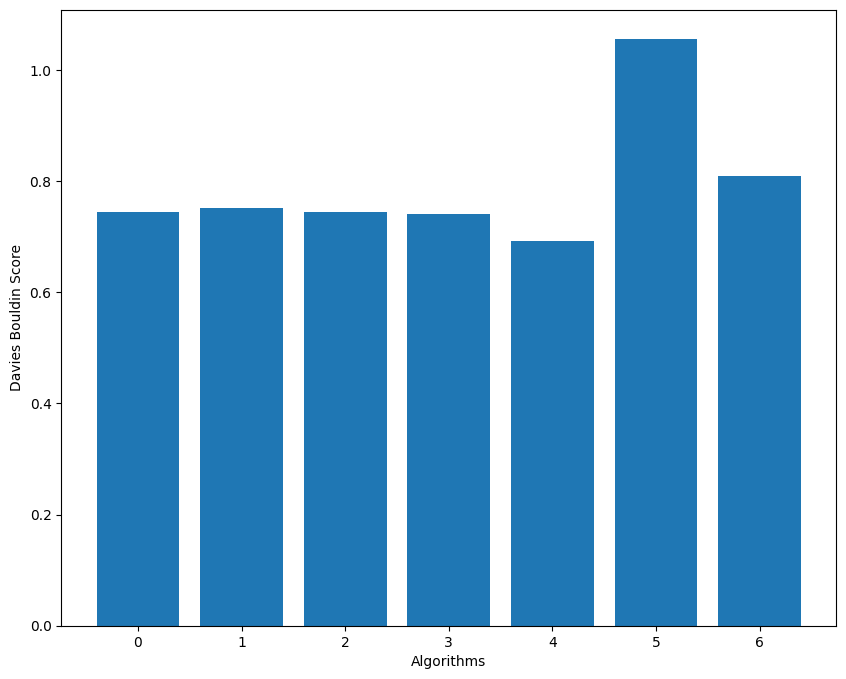

In [ ]:
plt.bar(range(len(xxxx)),xxxx)
# for i, value in enumerate(xyz):
#     plt.text(i,value+1, str(value), ha ='center', va='bottom' )
plt.xlabel("Algorithms")
plt.ylabel("Davies Bouldin Score")
# plt.ylim(0.3,0.6)
plt.show()

In [167]:
print("Clustering Kmeans             ",davies_bouldin_score(rfm_df_scaled,rfm['Kmeans']) )
print("Clustering Fuzzy C means      ",davies_bouldin_score(rfm_df_scaled,rfm['Fuzzy_c']) )
print("Clustering RM_Kmeans          ",davies_bouldin_score(rfm_df_scaled,rfm['RM_Kmeans']) )
# print("Clustering Incremental Kmeans ",davies_bouldin_score(rfm_df_scaled,rfm['Incremental']) )
print("Clustering Herarchical        ",davies_bouldin_score(rfm_df_scaled,rfm['Herarchical']) )
print("Clustering DBSCAN             ",davies_bouldin_score(rfm_df_scaled,rfm['DBS_clustering']) )
print("Clustering Mean Shift         ",davies_bouldin_score(rfm_df_scaled,rfm['Mean_Shift']) )

Clustering Kmeans              0.8368898894593583
Clustering Fuzzy C means       0.849441167794283
Clustering RM_Kmeans           0.836578564675165
Clustering Herarchical         0.8831514959147485
Clustering DBSCAN              1.598745370783494
Clustering Mean Shift          1.1873702300208122


In [166]:
print("Clustering Kmeans             ",calinski_harabasz_score(rfm_df_scaled,rfm['Kmeans']) )
print("Clustering Fuzzy C means      ",calinski_harabasz_score(rfm_df_scaled,rfm['Fuzzy_c']) )
print("Clustering RM_Kmeans          ",calinski_harabasz_score(rfm_df_scaled,rfm['RM_Kmeans']) )
print("Clustering Incremental Kmeans ",calinski_harabasz_score(rfm_df_scaled,rfm['Incremental']) )
print("Clustering Herarchical        ",calinski_harabasz_score(rfm_df_scaled,rfm['Herarchical']) )

Clustering Kmeans              2117.3849528377614
Clustering Fuzzy C means       2113.636156857529
Clustering RM_Kmeans           2117.3765681678387
Clustering Incremental Kmeans  2117.3849528377614
Clustering Herarchical         1436.185254157927
